<a href="https://colab.research.google.com/github/Jinukki/KJU/blob/master/15108329_Ch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch.4 신경망 학습
### 여기서 말하는 학습이란 <code>훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것</code>을 의미한다. 4장에서는 이 학습을 도와주는 손실 함수를 소개한다. 이 손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다. 이번 장에서는 이 방법으로 함수의 기울기를 활용하는 경사법을 소개한다.
---

## 4.1 데이터로부터 학습
### 신경망의 특징은 <code>데이터를 보고 학습할 수 있다는 점</code>이다. 실제 신경망에서 이 데이터는 수천에서, 수만 개 가까이 된다. 딥러닝 정도 되면 그 수는 수억에 이를 수 있다. 이러한 매개변수를 수작업으로 정한다는 것은 불가능하다. 이번 장에서는 신경망 학습에 대해 설명하고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해본다.

### 4.1.1 데이터 주도 학습
### 기계학습의 중심은 데이터에 존재한다. 기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도한다. 그 방법 중 하나로, 이미지에서 특징을 추출하고 그 패턴을 기계학습하는 방법이 있다. 이 특징은 벡터로 기술하고, SIFT, SURF, HOG 등의 특징을 많이 사용한다. 학습 방법에는 SVM, KNN 등이 있다.
### 그러나 여기까지는 규칙을 찾아내는 역할은 기계가 담당하지만, 여전히 특징은 사람이 설계하는 것에 주목해야 한다. 
### 신경망은 이미지를 있는 그대로 학습한다. <code>신경망에서는 이미지에 포함된 중요한 특징까지 기계가 스스로 학습</code>한다. 이러한 이유로 딥러닝을 종간단 기계학습(end-to-end learning)이라고도 한다. 여기에서 오는 신경망의 이점은 <code>모든 문제를 같은 맥락에서 풀 수 있다</code>는 점에 있다. 주어진 데이터를 온전히 학습하고, 문제의 패턴을 발견하려 시도한다.

### 4.1.2 훈련 데이터와 시험 데이터
### 기계학습은 범용능력을 제대로 평가하기 위해 데이터를 훈련 데이터와 시험 데이터로 나누어 진행된다. 이 <code>범용 능력을 획득</code>하는 것이 기계학습의 최종 목표이다. 더불어 하나의 데이터셋에만 지나치게 최적화된 오버피팅을 피하는 것이 기계학습의 중요한 과제이다.
---

## 4.2 손실 함수
### 신경망 학습에서는 현재의 상태를 하나의 지표로 표현하며 이 지표를 가장 좋게 만들어주는 가중치 매개변수 값을 탐색한다. 여기서 사용되는 지표가 <code>손실 함수</code>이다. 일반적으로 <code>평균 제곱 오차</code>와 <code>교차 엔트로피 오차</code>를 사용한다.



### 4.2.1 평균 제곱 오차
### 가장 많이 쓰이는 손실함수이다. 수식은 다음과 같다.
$$E=\frac{1}{2} \sum_{k} (y_k-t_k)^2$$
### 여기서 $y_k$ 는 신경망의 출력(추정) 값, $t_k$ 는 정답 레이블, k는 데이터의 차원 수를 나타낸다. 아래 예시와 같이 y와 t가 있다고 하자. y는 소프트맥스 함수의 출력이고 이는 확률로 해석할 수 있다. 또한 t는 원-핫 인코딩을 적용하였으며 정답이 2임을 알 수 있다. 이 데이터로 평균 제곱 오차를 파이썬으로 구현해보자.

In [0]:
import numpy as np

def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [0]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

### 첫 번째 y에서는 신경망의 출력값과 정답이 같으며, 두번째 y에서는 출력과 정답이 다르다. 이 결과를 통해 첫 번째 예의 손실 함수 쪽 손실이 작은 것을 볼 수 있다. 즉, 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단할 수 있다.
---

### 4.2.2 교차 엔트로피 오차
### 먼저 수식은 다음과 같다.
$$E=-\sum_{k} t_klogy_k$$
### 여기서 log는 자연로그이다. $y_k$ 와 $t_k$ 는 위와 같고 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.(원-핫 인코딩) 자연로그 함수에서 x가 1에 가까워질 수록 y가 0에 가까워지고 x가 0에 가까워질수록 y는 점점 작아진다. 즉, y는 확률을 나타낸다고 해석할 수 있다고 했으므로 정답일 때의 출력이 작아질수록 오차는 커진다.(식에서 음의 부호 참고) 그럼 교차 엔트로피 오차를 구현해보자. 다음 예에서 알 수 있듯이 log에 0이 들어가지 않도록 아주 작은 값인 delta를 더해준다.

In [0]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(+delta))

t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [0]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

### 결과를 통해서 알 수 있듯이 출력과 정답이 일치할 때 오차가 더 작다. 즉, 첫 번째 추정이 정잡일 가능성이 높다고 판단한 것이고 위의 평균 제곱 오차의 판단과 일치한다.
---

### 4.2.3 미니배치 학습
### 기계학습은 훈련 데이터를 이용한다. 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다. 이제 <code>훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법</code>을 생각해보자. 예로 교차 엔트로피 오차는 다음과 같이 된다.
$$E=-\frac{1}{N} \sum_{n}\sum_{k} t_{nk}logy_{nk}$$
### 여기서 $t_{nk}$ 는 n번째 데이터의 k번째 값을 의미한다. N은 데이터의 개수이며, N으로 나눔으로써 평균 손실 함수를 구하는 것이다. 이를 통해 훈련 데이터 개수와 상관없이 <code>언제나 통일된 지표</code>를 얻을 수 있다.
### 그런데 앞에서 이용했던 MNIST 데이터셋은 훈련 데이터가 60000개였다. 이런 경우 데이터 일부를 추려 근사치로 이용할 수 있다. 이 일부를 미니배치라고 한다. 쉽게 말하면 60000개 데이터 중 100개를 <code>무작위로 뽑아 학습</code>하는 것이다. 이를 <code>미니배치 학습</code>이라고 한다. MNIST 데이터셋을 이용해 구현해보자.

In [0]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


### 이 훈련데이터에서 데이터에서 무작위로 10장을 빼내어보자. np.random.choice() 함수를 이용하면 무작위로 원하는 개수만 꺼낼 수 있다. 예로 np.random.choice(60000, 10)은 0이상 60000미만의 수 중에서 무작위로 10개를 골라낸다.

In [0]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

---
### 4.2.4 (배치용) 교차 엔트로피 오차 구하기
### 이제 교차 엔트로피 오차 함수를 데이터가 하나인 경우와 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현해보자.

In [0]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)
    
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

### y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균 교차 엔트로피 오차를 계산한다.
### 정답 레이블이 원-핫 인코딩이 아닌 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있다.

In [0]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)
    
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/ batch_size

### 여기서 np.log(y[np.arange(batch_size)],t)를 간단히 설명하면 이 함수는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다. np.arange(batch_size)는 0부터 batch_size -1까지 배열을 생성하는데 즉 batch_size가 5이면 [0, 1, 2, 3, 4]의 넘파이 배열을 생성한다. t에 [2, 7, 0, 9, 4]의 배열이 저장되어 있다면 해당 함수는 [y[0,2], y[1,7], y[2,0, y[3,9], y[4,4]]인 넘파이 배열을 생성한다.

---

### 4.2.5 왜 손실 함수를 설정하는가?
### 그렇다면 우리는 왜 정확도라는 지표 대신 손실 함수 값이라는 우회적인 방법을 택하는 것일까?
### 이 의문은 <code>신경망 학습에서의 미분의 역할</code>에 주목하면 해결된다. 신경망 학습에서는 최적의 매개변수를 찾을 때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.
### 매개변수의 손실 함수 미분이란 <code>가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실 함수가 어떻게 변하냐</code>의 의미이다. 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 반대도 마찬가지이다. 그러나 미분 값이 0이라면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 다라지지 않는다.
### 정확도를 지표로 삼아서는 <code>안 되는 이유는 미분 값이 대부분의 장소에서 0</code>이 되어 매개변수를 갱신할 수 없기 때문이다. 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다.

### 이는 계단 함수를 활성화 함수로 사용하지 않는 이유와도 들어맞는다. 계단 함수의 미분은 아래 첫 번쨰 그림과 같이 대부분의 장소에서 0이다. 즉, 손실 함수의 지표로 삼는 것이 아무 의미가 없게 된다.
### 계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수의 미분(접선)은 아래 두 번째 그림과 같이 연속적으로 변한다. 즉, 어느 장소라도 미분 값이 0이 되지 않는다. 이는 신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있는 것이다.

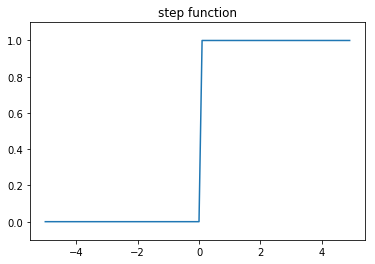

In [0]:
def step_function(x):
    return np.array(x>0, dtype=np.int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.title("step function")
plt.show()

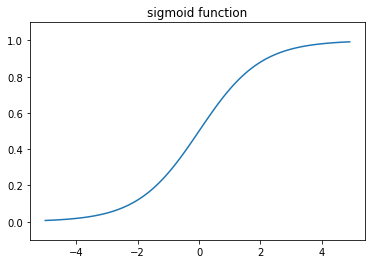

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.title("sigmoid function")
plt.show()